In [16]:
data = [
    "MH_01_easy",
    "MH_02_easy",
    "MH_03_medium",
    "MH_04_difficult",
    "MH_05_difficult",
    "V1_01_easy",
    "V1_02_medium",
    "V1_03_difficult",
    "V2_01_easy",
    "V2_02_medium",
    "V2_03_difficult"
]

# T_BS_0 = T_BS
# intrinsics_0 = intrinsics
# distortion_coefficients_0 = distortion_coefficients
import yaml
import numpy as np
for folder in data:
    with open(f"/home/data2/euroc_raw/{folder}/mav0/cam1/sensor.yaml", "r") as file:
        sensor_data = yaml.safe_load(file)
        T_BS = sensor_data["T_BS"]["data"]
        intrinsics = sensor_data["intrinsics"]
        print(intrinsics)
        distortion_coefficients = sensor_data["distortion_coefficients"]

        # print( np.array(intrinsics) - np.array(intrinsics_0))
        # print( np.array(distortion_coefficients) - np.array(distortion_coefficients_0))
        # print( np.array(T_BS) - np.array(T_BS_0))

[457.587, 456.134, 379.999, 255.238]
[457.587, 456.134, 379.999, 255.238]
[457.587, 456.134, 379.999, 255.238]
[457.587, 456.134, 379.999, 255.238]
[457.587, 456.134, 379.999, 255.238]
[457.587, 456.134, 379.999, 255.238]
[457.587, 456.134, 379.999, 255.238]
[457.587, 456.134, 379.999, 255.238]
[457.587, 456.134, 379.999, 255.238]
[457.587, 456.134, 379.999, 255.238]
[457.587, 456.134, 379.999, 255.238]


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

width = 752
height = 480
image_size = (width, height)

T_bc1 = np.array([[0.0148655429818, -0.999880929698, 0.00414029679422, -0.0216401454975],
                  [0.999557249008, 0.0149672133247, 0.025715529948, -0.064676986768],
                  [-0.0257744366974, 0.00375618835797, 0.999660727178, 0.00981073058949],
                  [0.0, 0.0, 0.0, 1.0]])

T_bc2 = np.array([[0.0125552670891, -0.999755099723, 0.0182237714554, -0.0198435579556],
                  [0.999598781151, 0.0130119051815, 0.0251588363115, 0.0453689425024],
                  [-0.0253898008918, 0.0179005838253, 0.999517347078, 0.00786212447038],
                  [0.0, 0.0, 0.0, 1.0]])

T_c2c1 = np.dot(np.linalg.inv(T_bc2), T_bc1)
R_c2c1 = T_c2c1[:3, :3]
t_c2c1 = T_c2c1[:3, 3]

print("t_c2c1:")
print(t_c2c1.T)

left_k = np.array([[458.654, 0.000000, 367.215],
                   [0.000000, 457.296, 248.375],
                   [0.000000, 0.000000, 1.000000]])

left_d = np.array([[-0.28340811, 0.07395907, 0.00019359, 1.76187114e-05, 0]])

right_k = np.array([[457.587, 0.000000, 379.999],
                    [0.000000, 456.134, 255.238],
                    [0.000000, 0.000000, 1.000000]])

right_d = np.array([[-0.28368365,  0.07451284, -0.00010473, -3.55590700e-05, 0]])

# canvas = np.zeros((image_size[1], image_size[0] * 2, 3), dtype=np.uint8)
# canvas_left = canvas[:, :image_size[0]]
# canvas_right = canvas[:, image_size[0]:]

t_c2c1:
[-0.11007381  0.00039912 -0.0008537 ]


In [18]:
print("stereo rectify...")

R1, R2, P1, P2, Q, validROIL, validROIR = cv2.stereoRectify(left_k, left_d, right_k, right_d, image_size, R_c2c1,t_c2c1, flags=cv2.CALIB_ZERO_DISPARITY, alpha=0.0)
print("R1:")
print(R1)
print("R2:")
print(R2)
print("P1:")
print(P1)
print("P2:")
print(P2)
print("Q:")
print(Q)
print("validROIL:")
print(validROIL)
print("validROIR:")
print(validROIR)

# R1
# import pypose as pp
# R1 = pp.from_matrix(R1, ltype=pp.SO3_type)
# R2 = pp.from_matrix(R2, ltype=pp.SO3_type)
# # R2 = pp.SO3(R2)

# (R1*R2.Inv())


stereo rectify...
R1:
[[ 0.99996635 -0.00142274  0.00807958]
 [ 0.00136574  0.99997418  0.00705563]
 [-0.00808941 -0.00704436  0.99994247]]
R2:
[[ 0.99996335 -0.00362581  0.00775544]
 [ 0.0036804   0.99996848 -0.00703585]
 [-0.00772969  0.00706413  0.99994517]]
P1:
[[436.2345864    0.         364.44123459   0.        ]
 [  0.         436.2345864  256.95167542   0.        ]
 [  0.           0.           1.           0.        ]]
P2:
[[436.2345864    0.         364.44123459 -48.01976196]
 [  0.         436.2345864  256.95167542   0.        ]
 [  0.           0.           1.           0.        ]]
Q:
[[   1.            0.            0.         -364.44123459]
 [   0.            1.            0.         -256.95167542]
 [   0.            0.            0.          436.2345864 ]
 [   0.            0.            9.0844804    -0.        ]]
validROIL:
(0, 0, 752, 480)
validROIR:
(0, 0, 752, 480)


In [22]:
P1[:, :3]

array([[436.2345864 ,   0.        , 364.44123459],
       [  0.        , 436.2345864 , 256.95167542],
       [  0.        ,   0.        ,   1.        ]])

# intrinsic

In [21]:
intrinsics = np.array([[P1[0, 0], P1[1, 1], P1[0, 2], P1[1, 2]]])
print(intrinsics)

[[436.2345864  436.2345864  364.44123459 256.95167542]]


# extrinsic

In [4]:
R1_inv = np.linalg.inv(R1)
R_new = np.dot(R2, R1_inv)
T_new = np.dot(R2, np.dot(-R1_inv, t_c2c1))

print("R_new:{} \n T_new:{}".format(R_new, T_new))

SE3 = np.zeros((4, 4))
SE3[:3, :3] = R_new
SE3[:3, 3] = T_new
SE3[3, 3] = 1.0
print("SE3:{}".format(SE3))
import pypose as pp

SE = pp.from_matrix(SE3, ltype=pp.SE3_type)
print("SE:{}".format(SE))


R_new:[[ 9.99997521e-01 -2.20530692e-03 -3.08574717e-04]
 [ 2.20073373e-03  9.99898036e-01 -1.41093478e-02]
 [ 3.39658696e-04  1.41086337e-02  9.99900411e-01]] 
 T_new:[ 0.11007415 -0.00016888  0.00088537]
SE3:[[ 9.99997521e-01 -2.20530692e-03 -3.08574717e-04  1.10074152e-01]
 [ 2.20073373e-03  9.99898036e-01 -1.41093478e-02 -1.68882895e-04]
 [ 3.39658696e-04  1.41086337e-02  9.99900411e-01  8.85373950e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
SE:SE3Type LieTensor:
LieTensor([ 1.1007e-01, -1.6888e-04,  8.8537e-04,  7.0547e-03, -1.6206e-04,
            1.1015e-03,  9.9997e-01], dtype=torch.float64)


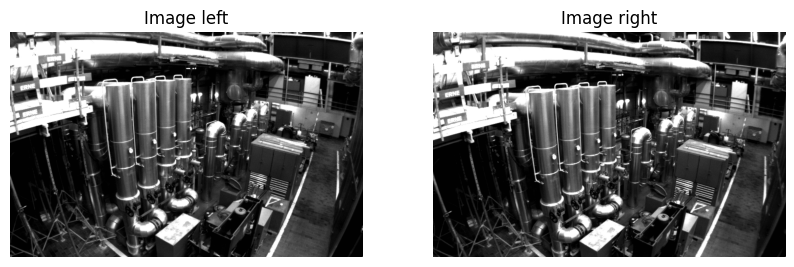

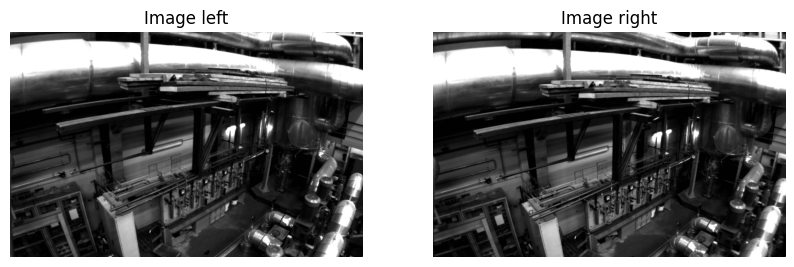

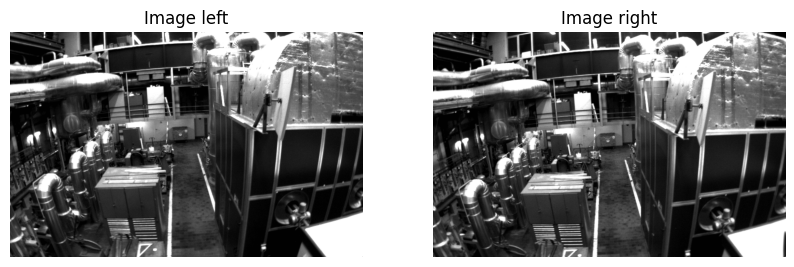

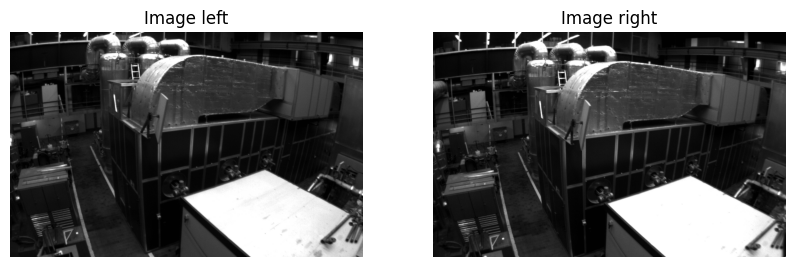

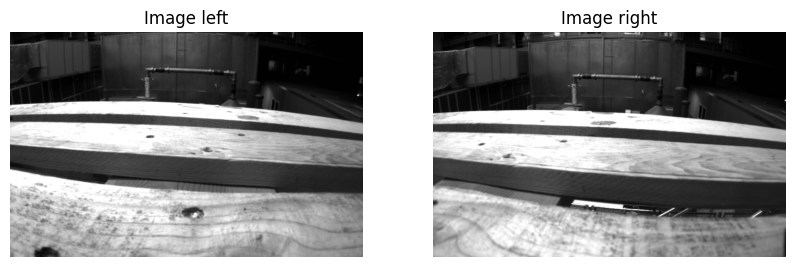

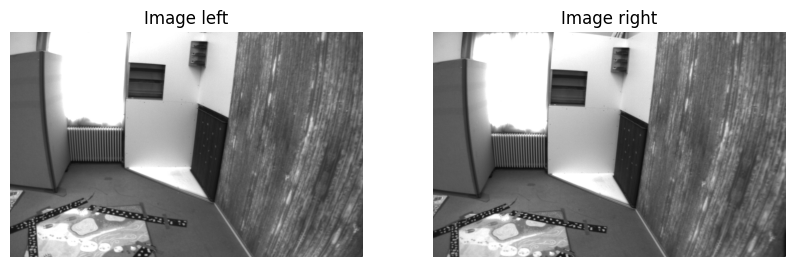

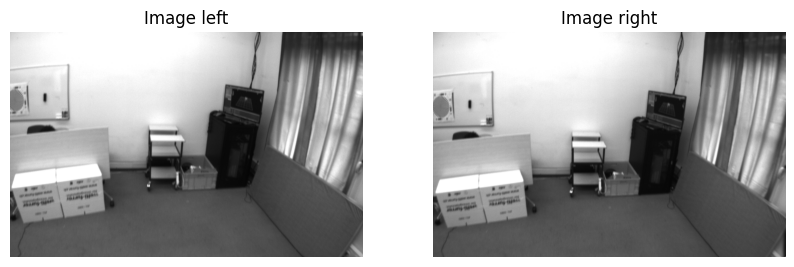

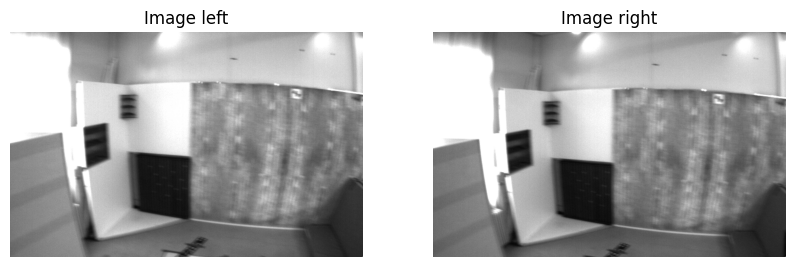

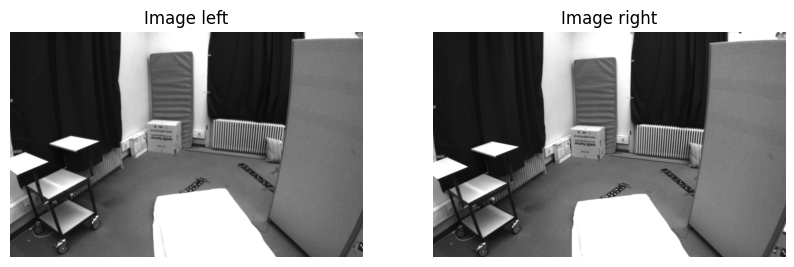

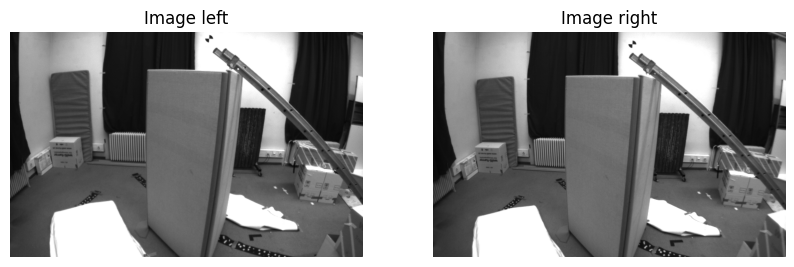

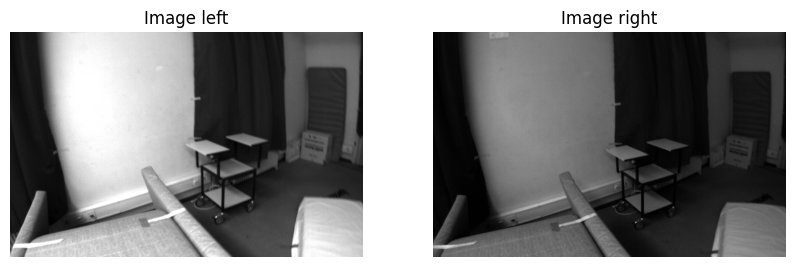

In [5]:


data_folder = [
    "MH_01_easy",
    "MH_02_easy",
    "MH_03_medium",
    "MH_04_difficult",
    "MH_05_difficult",
    "V1_01_easy",
    "V1_02_medium",
    "V1_03_difficult",
    "V2_01_easy",
    "V2_02_medium",
    "V2_03_difficult"
]
import os

for dataset in data_folder:

    data_root = f'/home/data2/euroc_raw/{dataset}/mav0/cam'
    folder_path = data_root + str(0) + "/data"
    items = os.listdir(folder_path)

    # folder_path = "/home/data2/euroc_raw/dataset/mav0/cam0/data"  # Change this to the path of the folder you want to list items for
    # print(items)
    
    for item in items:
        color_left = cv2.imread(data_root + str(0) + "/data/" + item, cv2.IMREAD_COLOR)
        color_right = cv2.imread(data_root + str(1) + "/data/" + item, cv2.IMREAD_COLOR)
        # Create a 1x2 subplot and plot the images side by side
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # plot color_left
        axes[0].imshow(color_left)
        axes[0].axis('off')
        axes[0].set_title('Image left')
        # print("color_left.shape:{}".format(color_left.shape))

        axes[1].imshow(color_right)
        axes[1].axis('off')
        axes[1].set_title('Image right')
        # print("rectifyImageR.shape:{}".format(color_right.shape))
                
        break

color_left.shape:(480, 752, 3)
rectifyImageR.shape:(480, 752, 3)


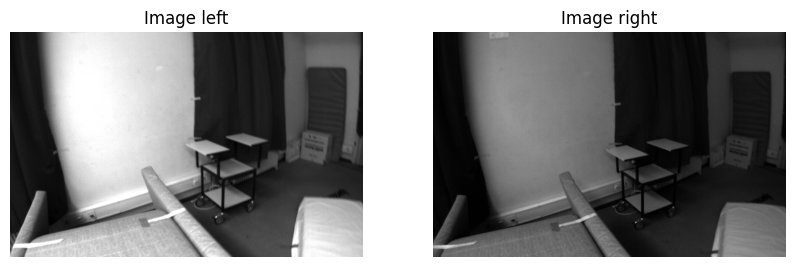

In [6]:
# Create a 1x2 subplot and plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot color_left
axes[0].imshow(color_left)
axes[0].axis('off')
axes[0].set_title('Image left')
print("color_left.shape:{}".format(color_left.shape))

axes[1].imshow(color_right)
axes[1].axis('off')
axes[1].set_title('Image right')
print("rectifyImageR.shape:{}".format(color_right.shape))

In [7]:
pp.SE3([ 1.1007e-01, -1.6888e-04,  8.8537e-04,  7.0547e-03, -1.6206e-04,
            1.1015e-03,  9.9997e-01])

SE3Type LieTensor:
LieTensor([ 1.1007e-01, -1.6888e-04,  8.8537e-04,  7.0547e-03, -1.6206e-04,
            1.1015e-03,  9.9997e-01])

In [8]:
fx = P1[0, 0]
baseline = np.abs(P1[0, 3] - P2[0, 3]) / fx
print("baseline:{}".format(baseline))

baseline:0.11007784219176107


In [9]:
M = P1[:, :3]
import numpy as np
Q, R = np.linalg.qr(np.linalg.inv(M))
K = np.linalg.inv(R)
K = K / K[2, 2]
K

array([[436.2345864 ,   0.        , 364.44123459],
       [  0.        , 436.2345864 , 256.95167542],
       [  0.        ,   0.        ,   1.        ]])

In [13]:
mapLx, mapLy = cv2.initUndistortRectifyMap(left_k, left_d, R1, P1[:3, :3], image_size, cv2.CV_32FC1)
mapRx, mapRy = cv2.initUndistortRectifyMap(right_k, right_d, R2, P2[:3, :3], image_size, cv2.CV_32FC1)

rectifyImageL = cv2.remap(color_left, mapLx, mapLy, cv2.INTER_LINEAR)
rectifyImageR = cv2.remap(color_right, mapRx, mapRy, cv2.INTER_LINEAR)

np.save("remap_variables.npy", [mapLx, mapLy, mapRx, mapRy])

# plt.imshow(rectifyImageL)

In [14]:
mapLx

array([[ 62.36468 ,  63.007393,  63.650734, ..., 676.9543  , 677.5749  ,
        678.19495 ],
       [ 62.2352  ,  62.877632,  63.5207  , ..., 677.08136 , 677.7017  ,
        678.3215  ],
       [ 62.10579 ,  62.747944,  63.39074 , ..., 677.20844 , 677.8284  ,
        678.4479  ],
       ...,
       [ 58.70676 ,  59.337704,  59.96951 , ..., 681.5129  , 682.1197  ,
        682.72577 ],
       [ 58.83621 ,  59.467316,  60.09928 , ..., 681.3895  , 681.9965  ,
        682.6028  ],
       [ 58.965923,  59.5972  ,  60.229324, ..., 681.26587 , 681.8731  ,
        682.47955 ]], dtype=float32)

In [11]:
# load remap variables
mapLx1, mapLy1, mapRx1, mapRy1 = np.load("remap_variables.npy", allow_pickle=True)

In [12]:
mapLx1 - mapLx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

rectifyImageL.shape:(480, 752, 3)
rectifyImageR.shape:(480, 752, 3)


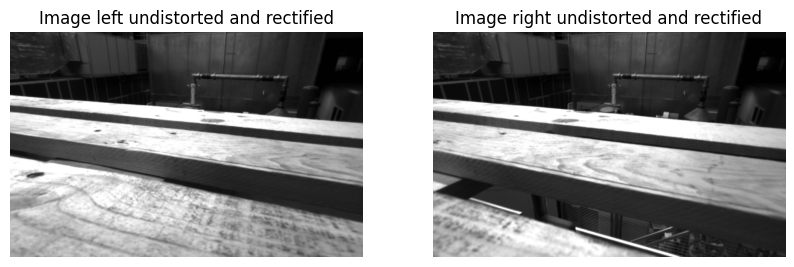

In [ ]:
# Create a 1x2 subplot and plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(rectifyImageL)
axes[0].axis('off')
axes[0].set_title('Image left undistorted and rectified')
print("rectifyImageL.shape:{}".format(rectifyImageL.shape))

axes[1].imshow(rectifyImageR)
axes[1].axis('off')
axes[1].set_title('Image right undistorted and rectified')
print("rectifyImageR.shape:{}".format(rectifyImageR.shape))


In [39]:
!ls /home/data2/euroc_raw/MH_04_difficult/mav0/cam0/data/

1403638127245096960.png  1403638161145096960.png  1403638195045096960.png
1403638127295097088.png  1403638161195097088.png  1403638195095097088.png
1403638127345096960.png  1403638161245096960.png  1403638195145096960.png
1403638127395097088.png  1403638161295097088.png  1403638195195097088.png
1403638127445096960.png  1403638161345096960.png  1403638195245096960.png
1403638127495097088.png  1403638161395097088.png  1403638195295097088.png
1403638127545096960.png  1403638161445096960.png  1403638195345096960.png
1403638127595097088.png  1403638161495097088.png  1403638195395097088.png
1403638127645096960.png  1403638161545096960.png  1403638195445096960.png
1403638127695097088.png  1403638161595097088.png  1403638195495097088.png
1403638127745096960.png  1403638161645096960.png  1403638195545096960.png
1403638127795097088.png  1403638161695097088.png  1403638195595097088.png
1403638127845096960.png  1403638161745096960.png  1403638195645096960.png
1403638127895097088.png  1403638161795

In [ ]:
data_root = '/home/data2/euroc_raw/MH_04_difficult/mav0/cam'

color_left = cv2.imread(data_root + str(0) + "/data/1403638127345096960.png", cv2.IMREAD_COLOR)
color_right = cv2.imread(data_root + str(1) + "/data/1403638127345096960.png", cv2.IMREAD_COLOR)


In [59]:
rectifyImageL_0 = rectifyImageL

In [56]:
rectifyImageL_n1 = rectifyImageL.copy()

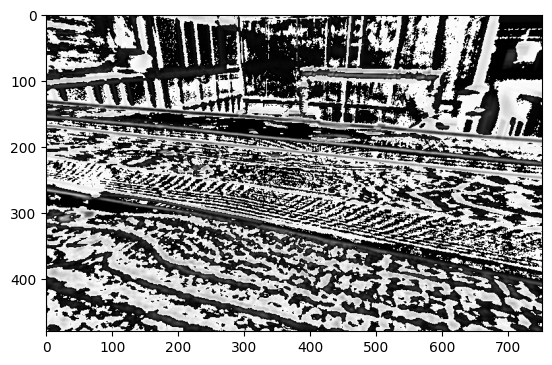

In [61]:
diff = rectifyImageL_0 - rectifyImageL_n1
plt.imshow(diff)

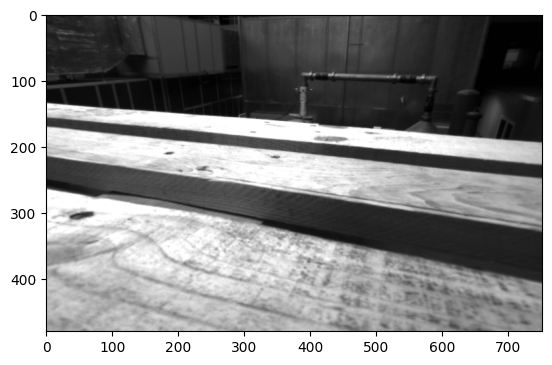

In [40]:
plt.imshow(rectifyImageL)

### $\alpha = 1$

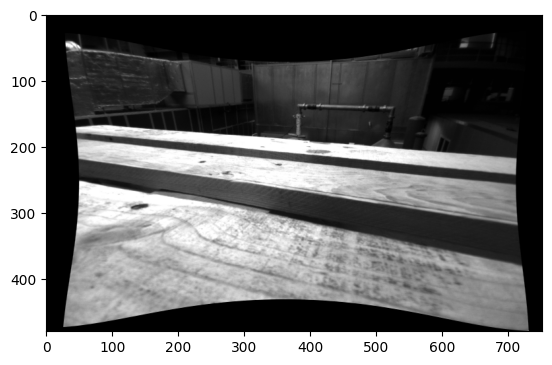

In [46]:
plt.imshow(rectifyImageL)

rectifyImageL.shape:(480, 752, 3)
rectifyImageR.shape:(480, 752, 3)


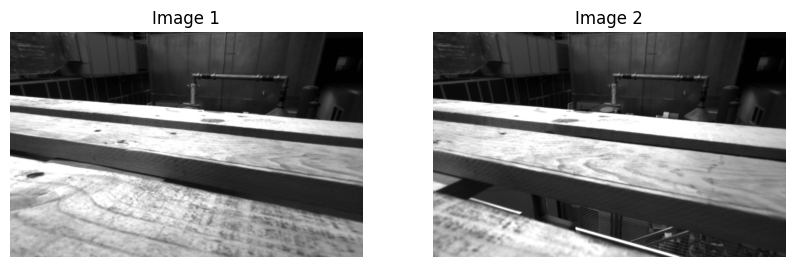

In [39]:
# Create a 1x2 subplot and plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot color_left
# axes[0].imshow(color_left)
# axes[0].axis('off')
# axes[0].set_title('Image 1')
# print("color_left.shape:{}".format(color_left.shape))

axes[0].imshow(rectifyImageL)
axes[0].axis('off')
axes[0].set_title('Image 1')
print("rectifyImageL.shape:{}".format(rectifyImageL.shape))

axes[1].imshow(rectifyImageR)
axes[1].axis('off')
axes[1].set_title('Image 2')
print("rectifyImageR.shape:{}".format(rectifyImageR.shape))


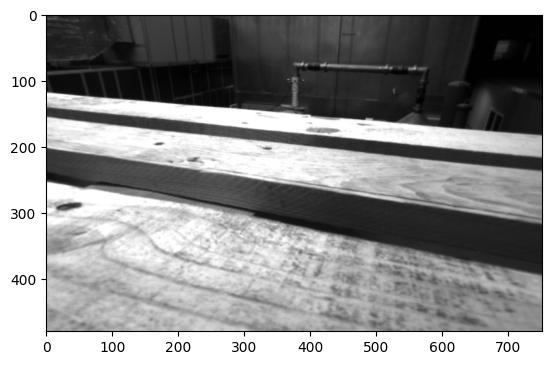

In [21]:
plt.imshow(rectifyImageL)
plt.imshow(rectifyImageR)

In [ ]:
canvas_left[:,:] = rectifyImageL
canvas_right[:,:] = rectifyImageR

cv2.rectangle(canvas_left, validROIL, (255, 0, 0), 3, 8)
cv2.rectangle(canvas_right, validROIR, (255, 0, 0), 3, 8)

for i in range(0, canvas.shape[0], 10):
    b = np.random.randint(256)
    g = np.random.randint(256)
    r = np.random.randint(256)
    cv2.line(canvas, (0, i), (canvas.shape[1], i), (b, g, r), 1, 8)

print("stereo rectify done")
cv2.imshow("canvas", canvas)
cv2.waitKey(0)

cv2.destroyAllWindows()
